# 实验一 基本信号的产生

## 任务一

验证程序实例中的相关程序。

## A

三角波的平移、翻转和尺度变换。

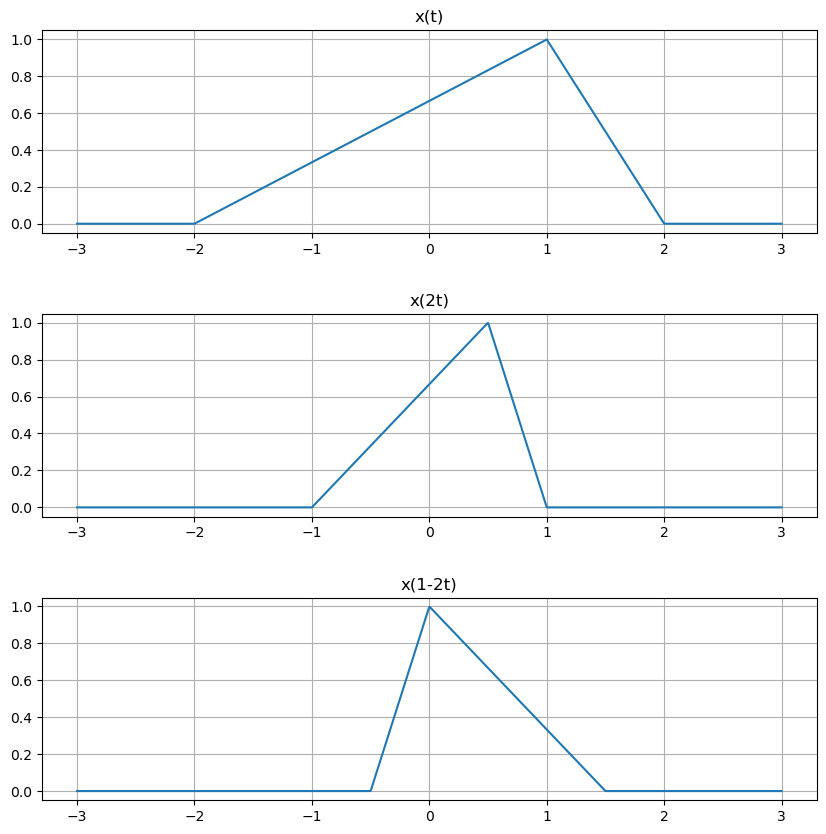

In [43]:
# 导入 需要的 library 库  
import numpy as np  # 科学计算
import matplotlib.pyplot as plt  # 画图


# noinspection PyPep8Naming
def triangle_wave(x, width, skew):  # 幅度为hc=1，宽度为width,斜度为skew的三角波，skew范围[-1, 1]，当skew=0，产生对称的三角波信号
    # 产生幅度为hc，宽度为width，且以0为中心左右各展开width/2大小，斜度为skew的三角波。
    if not (-1 <= skew <= 1):
        raise Exception("skew value ERROR!")   # skew范围不对，抛出异常
    hc = 1  # 三角波默认最大幅度，可以通过外部直接乘一个幅度值改变，该点横坐标通过下式计算
    xPoint = width / 2 * skew  # 三角波信号拐点横坐标，即上升沿和下降沿的横坐标

    if (x >= width / 2) or (x <= -width / 2):  # 宽度之外的值为0
        r = 0.0
    elif x > xPoint:  # 下降沿的函数
        r = -(x - xPoint) / (width / 2 - xPoint) + hc
    else:  # 上升沿的函数
        r = (x - xPoint) / (width / 2 + xPoint) + hc
    return r


x = np.linspace(-3, 3, 1000)  # 定义时间序列
y = np.array([triangle_wave(t, 4.0, 0.5) for t in x])  # x(t)信号
y2 = np.array([triangle_wave(2 * t, 4.0, 0.5) for t in x])  # x(2t)信号
y3 = np.array([triangle_wave(1 - 2 * t, 4.0, 0.5) for t in x])  # x(1-2t)信号
fig, axs = plt.subplots(3, 1, figsize=(10, 10))  # 通过figsize调整图大小
plt.subplots_adjust(wspace=0, hspace=0.4)  # 通过hspace调整子图间距
plt.subplot(311)  # 绘制x(t)信号的子图
plt.grid()  # 显示网格
plt.title('x(t)')  # x(t)信号的子图title
plt.plot(x, y)  # 绘制x(t)信号
plt.subplot(312)  # 绘制x(t)信号的子图
plt.grid()  # 显示网格
plt.title('x(2t)')  # x(2t)信号的子图title
plt.plot(x, y2)  # 绘制x(2t)信号
plt.subplot(313)  # 绘制x(1-2t)信号的子图
plt.grid()  # 显示网格
plt.title('x(1-2t)')  # x(1-2t)信号的子图title
plt.plot(x, y3)  # 绘制x(1-2t)信号
plt.show()  # 显示图像

### B

离散尺度序列及其尺度变换。

/var/folders/c8/c991tv453sl7r0wy6k3h9zjr0000gn/T/ipykernel_2831/2215951593.py:12: RuntimeWarning: invalid value encountered in power
  xn2 = 2.0 * np.power(a, 0.5 * n) # 计算x(0.5n)信号


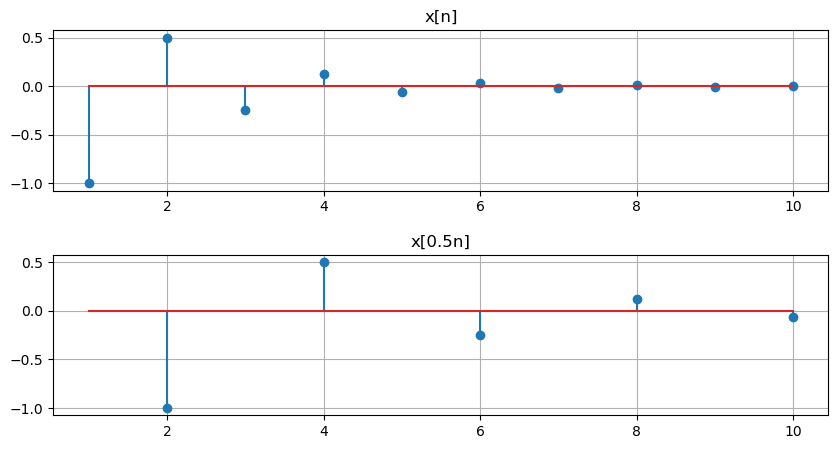

In [44]:
A = 2.0 # 信号幅度
a = -0.5 # 指数信号底数
n = np.linspace(1,10,10) # 离散时间序列
xn = A * np.power(a,n) # 计算x(n)信号
fig, axs = plt.subplots(2, 1, figsize=(10, 5)) # 通过figsize调整图大小
plt.subplots_adjust(wspace = 0, hspace = 0.4) # 通过hspace调整子图间距
plt.subplot(211) # 绘制x(n)信号的子图
# plt.stem(n,xn,use_line_collection=True) # 绘制x(n)信号
plt.stem(n, xn)
plt.grid() # 显示网格
_ = plt.title('x[n]') # x[n]信号title
xn2 = 2.0 * np.power(a, 0.5 * n) # 计算x(0.5n)信号
plt.subplot(212) # 绘制x(0.5n)信号的子图
# plt.stem(n,xn2,use_line_collection=True) # 绘制x(0.5n)信号
plt.stem(n, xn2)
plt.grid() # 显示网格
_ = plt.title('x[0.5n]') # x[0.5n]信号title
plt.show() # 显示图像

## 任务二

利用

$$
x(t) = u(t) - u(t - 2) + u(t - 0.5) - u(t - 1.5), \quad (0\le t \le 3)
$$

编写相关程序，绘制出 $x(-2t), x(t/2+1)$ 和 $5x(t)$ 波形。

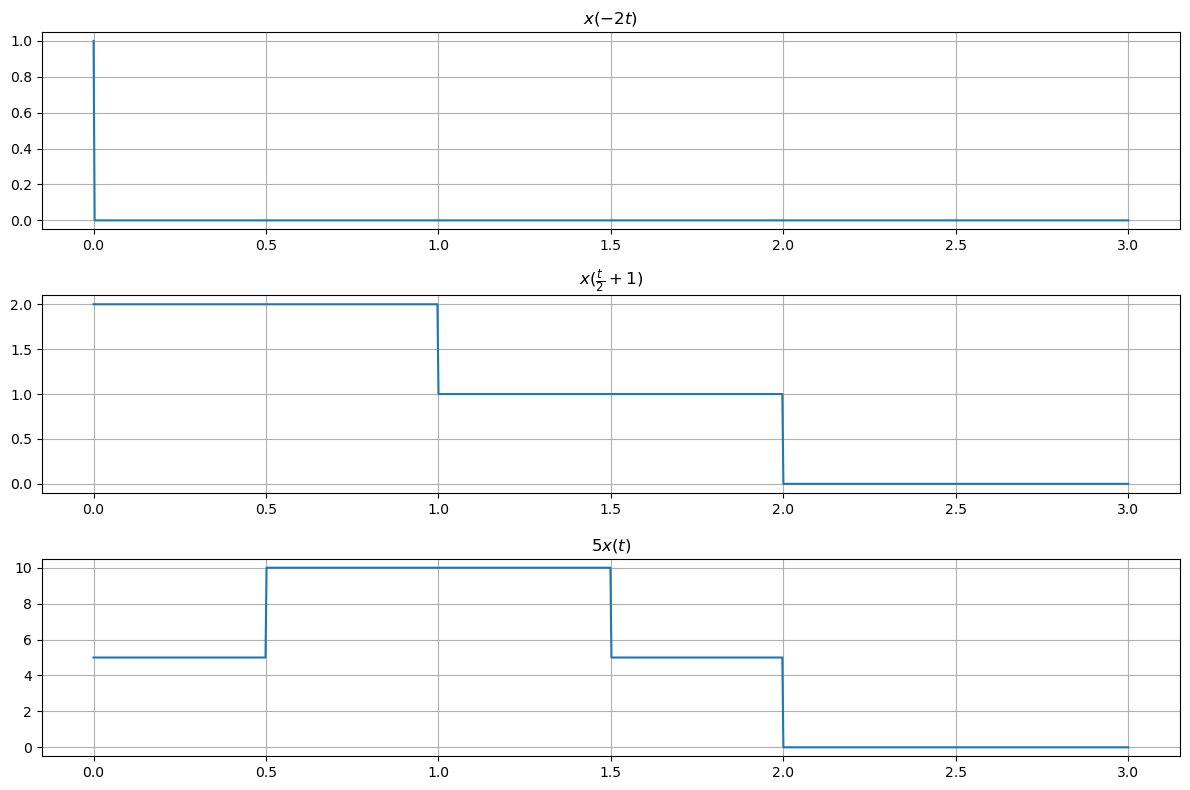

In [45]:
# 定义单位阶跃函数
def u(t):
    return np.where(t >= 0, 1, 0)

# 定义 x(t)
def x(t):
    return u(t) - u(t - 2) + u(t - 0.5) - u(t - 1.5)

t = np.linspace(0, 3, 1000)

# 原始信号
y = x(t)
# x(-2t)
y1 = x(-2 * t)
# x(t/2 + 1)
y2 = x(t / 2 + 1)
# 5x(t)
y3 = 5 * x(t)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, y1)
plt.title(r'$x(-2t)$')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, y2)
plt.title(r'$x(\frac{t}{2}+1)$')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, y3)
plt.title(r'$5x(t)$')
plt.grid()

plt.tight_layout()
plt.show()

## 任务三

设

$$
x[n] = \begin{cases}
-1, & n < -2\\
n, & -2 \le n \le 1 \\
\frac{1}{n} & n > 1
\end{cases}
$$

编写程序，绘制 $x[-n], x[2n + 2], x[n / 2], (\quad -20 \le n \le 20)$

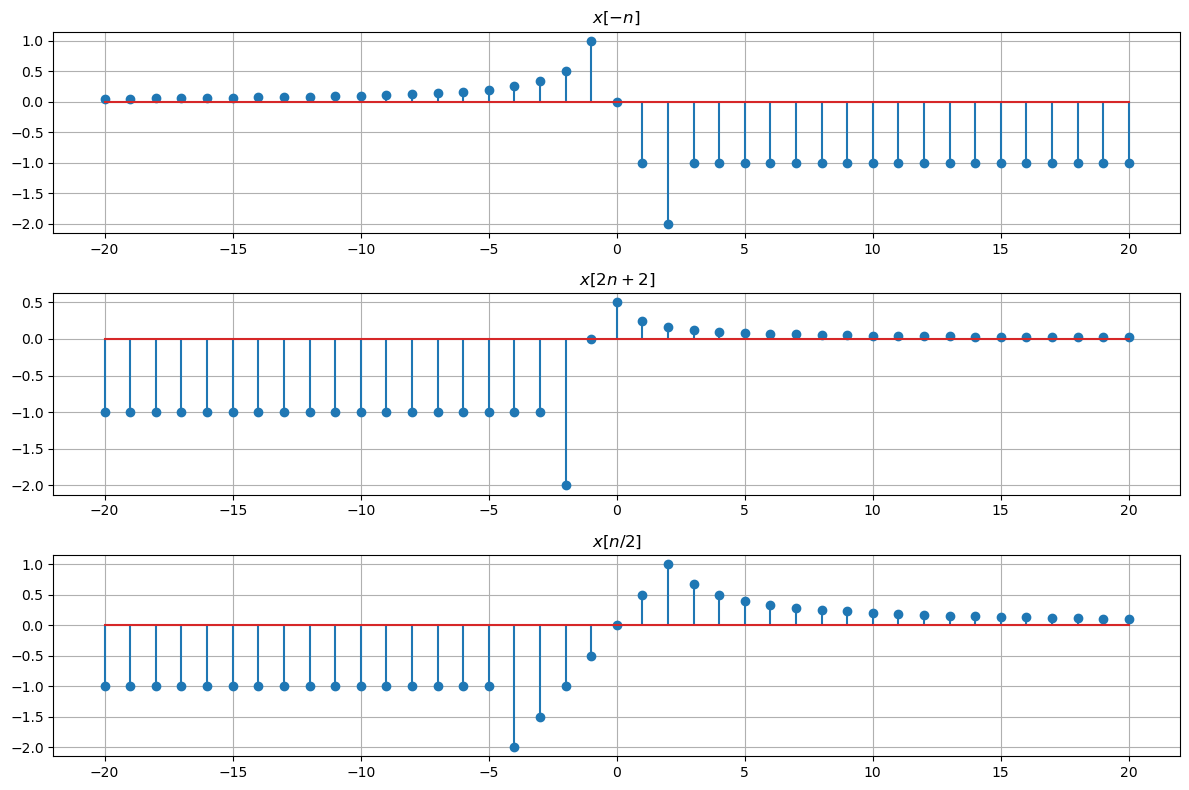

In [46]:
# 定义 x[n]
def x_n(n):
    n = np.array(n)
    result = np.zeros_like(n, dtype=float)
    result[n < -2] = -1
    mask1 = (n >= -2) & (n <= 1)
    result[mask1] = n[mask1]
    mask2 = n > 1
    result[mask2] = 1 / n[mask2]
    return result

n = np.arange(-20, 21)

# x[-n]
y1 = x_n(-n)
# x[2n + 2]
y2 = x_n(2 * n + 2)
# x[n / 2]
# 由于 n/2 可能不是整数，这里用插值法
n_half = n / 2
y3 = x_n(n_half)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(n, y1)
plt.title(r'$x[-n]$')
plt.grid()

plt.subplot(3, 1, 2)
plt.stem(n, y2)
plt.title(r'$x[2n+2]$')
plt.grid()

plt.subplot(3, 1, 3)
plt.stem(n, y3)
plt.title(r'$x[n/2]$')
plt.grid()

plt.tight_layout()
plt.show()

# 实验二 信号的卷积

## 任务一

验证程序实例中的相关程序。

### A

连续时间信号的卷积：

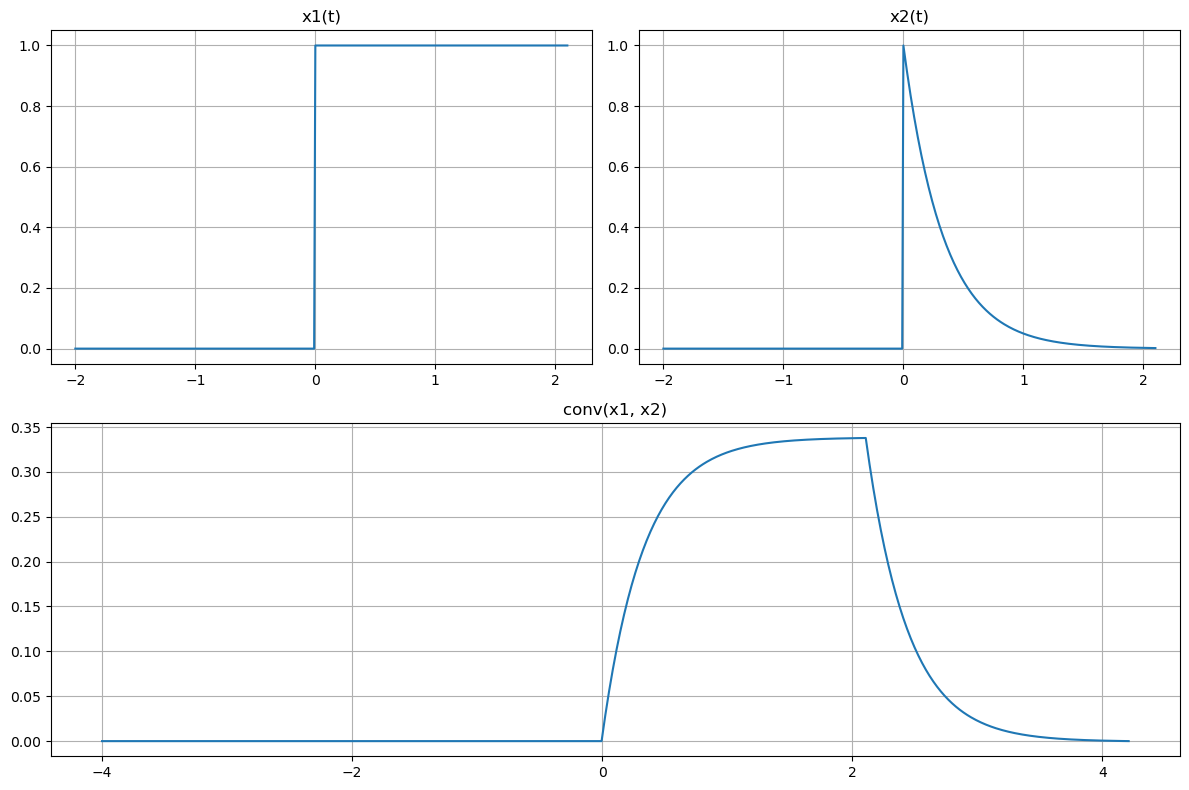

In [47]:
fs = 100
t1 = np.array([t/fs for t in range(-200,211)])
x1 = np.array([1 if t>=0 else 0 for t in t1])
x2 = np.array([np.exp(-3*t) if t>=0 else 0 for t in t1])
y1 = sg.convolve(x1, x2)/fs
n = len(y1)
tt = np.linspace(-4, 4.21, n)

fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

ax1.plot(t1, x1)
ax1.set_title('x1(t)')
ax1.grid()

ax2.plot(t1, x2)
ax2.set_title('x2(t)')
ax2.grid()

ax3.plot(tt, y1)
ax3.set_title('conv(x1, x2)')
ax3.grid()

plt.tight_layout()
plt.show()

### B

离散时间信号卷积：

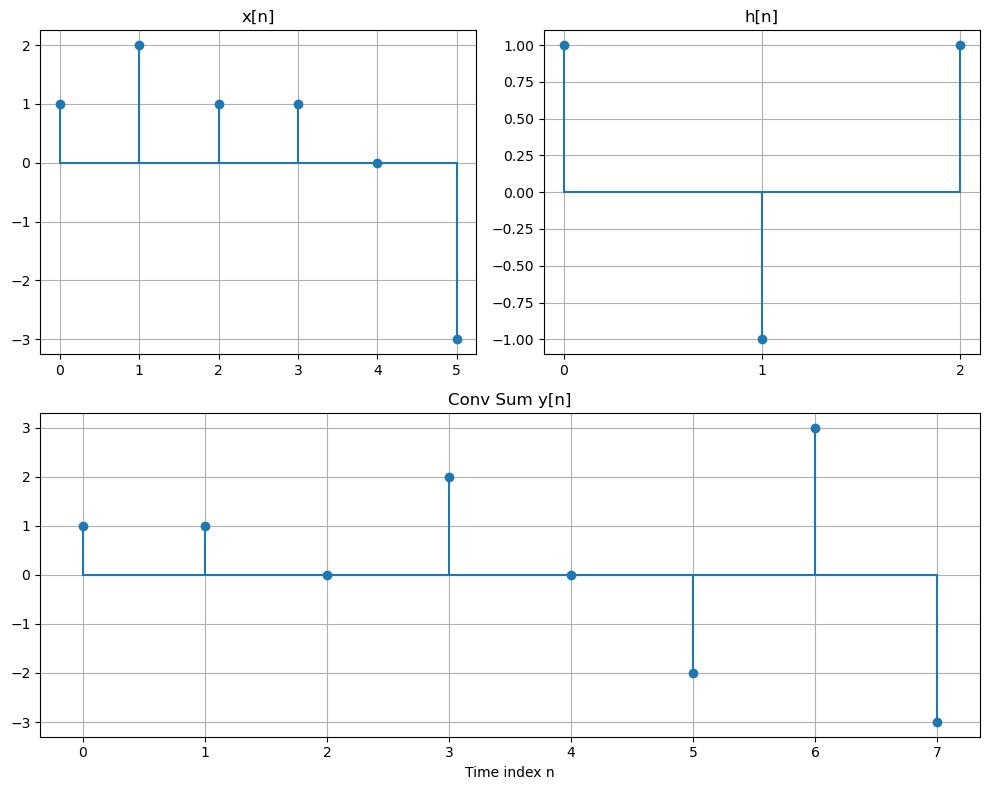

In [48]:
n1 = np.linspace(0, 5, 6)  # 时间序列[0 1 2 3 4 5]
x1 = [1, 2, 1, 1, 0, -3]  # 信号x[n]
n2 = np.linspace(0, 2, 3)  # 时间序列[0 1 2]
x2 = [1, -1, 1]  # 信号h[n]
y = sg.convolve(x1, x2, 'full')  # 卷积
n3 = np.linspace(0, 7, 8)

fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

ax1.stem(n1, x1, basefmt="-")
ax1.set_title('x[n]')
ax1.grid(True)

ax2.stem(n2, x2, basefmt="-")
ax2.set_title('h[n]')
ax2.set_xticks(np.arange(0, 3, step=1.0))
ax2.grid(True)

ax3.stem(n3, y, basefmt="-")
ax3.set_title('Conv Sum y[n]')
ax3.set_xlabel('Time index n')
ax3.grid(True)

plt.tight_layout()
plt.show()

## 任务二

编写程序，绘制下列信号的卷积波形。

### A

已知

$$
x_1(t) = tu(t), \quad x_2(t) = e^{-t}u(t)
$$

求 $x_1(t) * x_2(t)$，要求：采样频率 $fs = 1000$，时间 $t \in [-1.1, 2.1]$


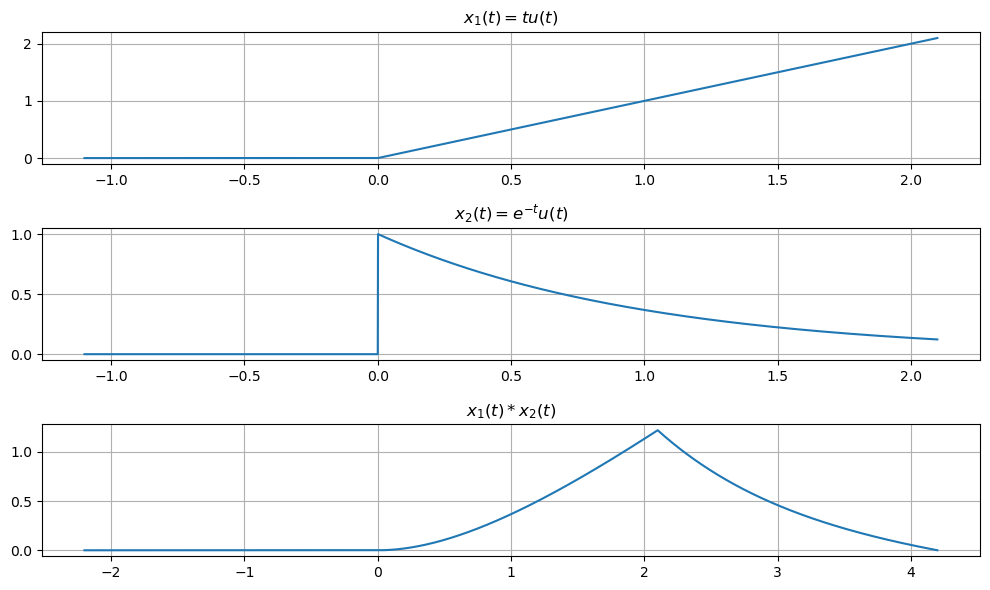

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg

# --- 连续时间卷积 ---
fs = 1000
t = np.arange(-1.1, 2.1, 1/fs)
u = lambda t: np.where(t >= 0, 1, 0)
x1 = t * u(t)
x2 = np.exp(-t) * u(t)
y = sg.convolve(x1, x2) / fs
# 卷积后时间轴
t_conv = np.arange(2*len(t)-1) / fs + (t[0] + t[0])

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, x1)
plt.title(r'$x_1(t) = t u(t)$')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, x2)
plt.title(r'$x_2(t) = e^{-t} u(t)$')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t_conv, y)
plt.title(r'$x_1(t) * x_2(t)$')
plt.grid()
plt.tight_layout()
plt.show()


### B

已知

$$
x[n] = [3, 2, 1, -2, 1, 0, 4, 0, 3; n = 0:8], \quad h[n] = [-1, -2, 3, -4, 3, 2, 1; n = 0 : 6]
$$

求 $x[n] * h[n]$

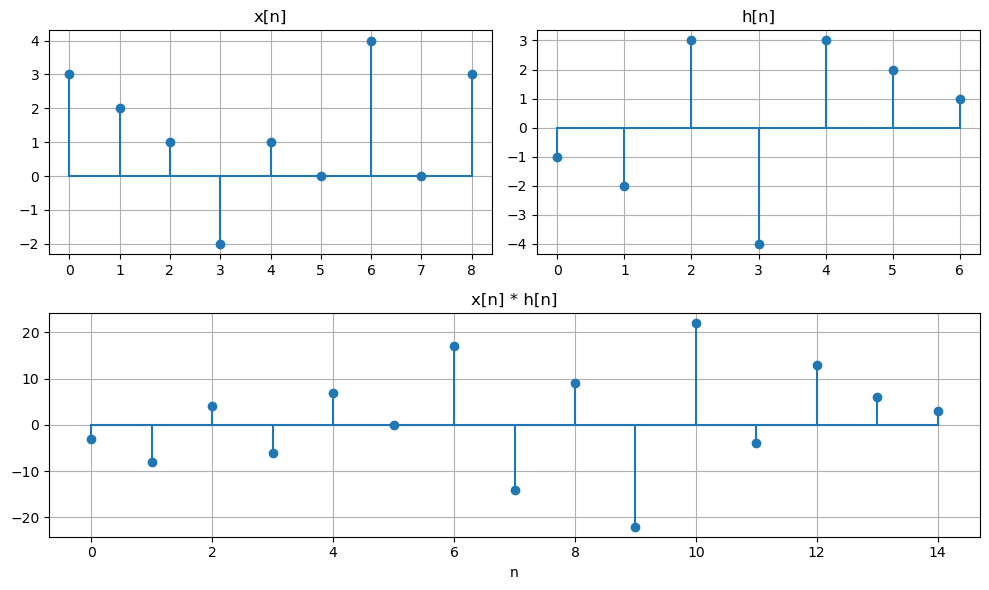

In [50]:
# --- 离散时间卷积 ---
x = [3, 2, 1, -2, 1, 0, 4, 0, 3]
h = [-1, -2, 3, -4, 3, 2, 1]
y_dis = sg.convolve(x, h, 'full')
n_x = np.arange(0, len(x))
n_h = np.arange(0, len(h))
n_y = np.arange(0, len(y_dis))

fig = plt.figure(figsize=(10, 6))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

ax1.stem(n_x, x, basefmt="-")
ax1.set_title('x[n]')
ax1.grid(True)

ax2.stem(n_h, h, basefmt="-")
ax2.set_title('h[n]')
ax2.grid(True)

ax3.stem(n_y, y_dis, basefmt="-")
ax3.set_title('x[n] * h[n]')
ax3.set_xlabel('n')
ax3.grid(True)

plt.tight_layout()
plt.show()

## 分析题

### A

连续时间与离散时间信号的卷积定义是什么？卷积的作用是什么？

#### Answer

1. 连续时间信号的卷积定义

    连续时间信号 $x_1(t)$ 和 $x_2(t)$ 的卷积定义为：
    $$
    y(t) = (x_1 * x_2)(t) = \int_{-\infty}^{+\infty} x_1(\tau) x_2(t - \tau) d\tau
    $$

1. 离散时间信号的卷积定义

    离散时间信号 $x_1[n]$ 和 $x_2[n]$ 的卷积定义为：
    $$
    y[n] = (x_1 * x_2)[n] = \sum_{k=-\infty}^{+\infty} x_1[k] x_2[n - k]
    $$

1. 卷积的作用

   - 卷积描述了一个信号经过线性时不变系统（LTI系统）后的输出，是系统输入与系统冲激响应的“加权叠加”。
   - 卷积可以用来分析系统的时域响应、滤波、平滑、去噪等。
   - 在信号处理中，卷积是理解系统特性和信号变化的重要工具。

### B

`conv` 函数只输出了卷积的结果，没有输出对应的时间向量，如何使得时间向量和卷积的结果对应起来？

#### Answer

可以通过计算卷积结果的时间（或序列）范围，使卷积结果与时间向量一一对应。方法如下：

- **连续时间信号**：  
  若 $t_1$ 和 $t_2$ 分别为两个信号的时间向量，步长为 $dt$，则卷积后时间向量为：
  $$
  t_{conv} = [t_1[0] + t_2[0],\ t_1[0] + t_2[0] + dt,\ \ldots,\ t_1[-1] + t_2[-1]]
  $$
  或用代码：
  ```python
  t_conv = np.arange(0, len(y)) * dt + (t1[0] + t2[0])
  ```
  这样 $y$ 和 $t_{conv}$ 就一一对应。

- **离散时间信号**：  
  若 $n_1$ 和 $n_2$ 为两个信号的序列范围，则卷积后序列范围为：
  $$
  n_{conv} = [n_1[0] + n_2[0],\ n_1[0] + n_2[0] + 1,\ \ldots,\ n_1[-1] + n_2[-1]]
  $$
  这样可以正确对应每个卷积结果的索引。

# 实验三 周期信号的傅立叶级数

## 任务一

### A

给定下面的周期三角信号 $x(t)$ ，用 Python 分别计算并绘制其复指数形式和三角函数形式的傅立叶系数级数，并用有限项级数 $x_N(t), \quad N = 1, \cdots, 10$，逼近 $x(t)$。

$$
x(t) = x(t + T) = \begin{cases}
t, & 0 \le t \le \frac{T}{2} \\
4 - t, & \frac{T}{2} < t \le T
\end{cases}, \quad T = 4
$$

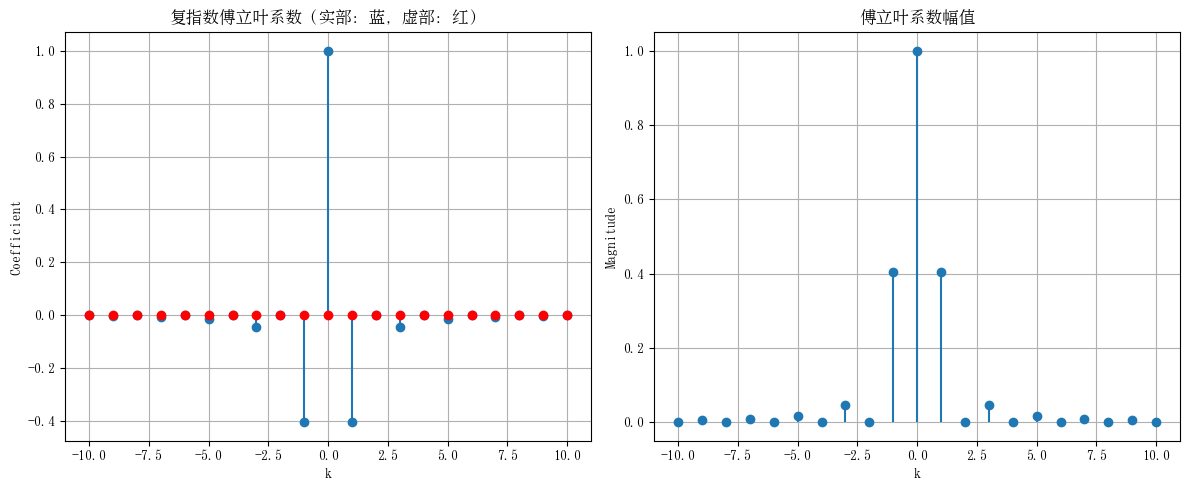

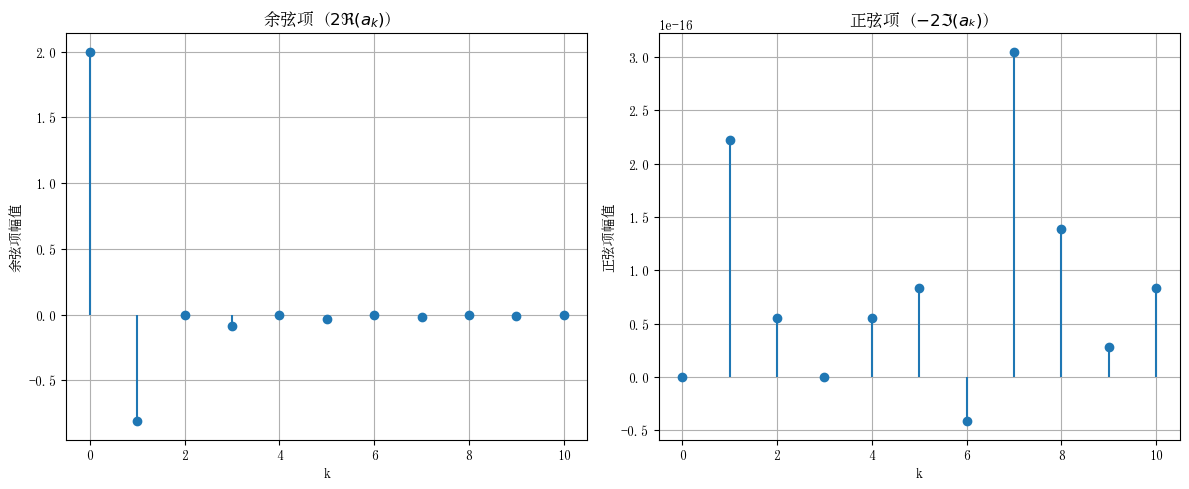

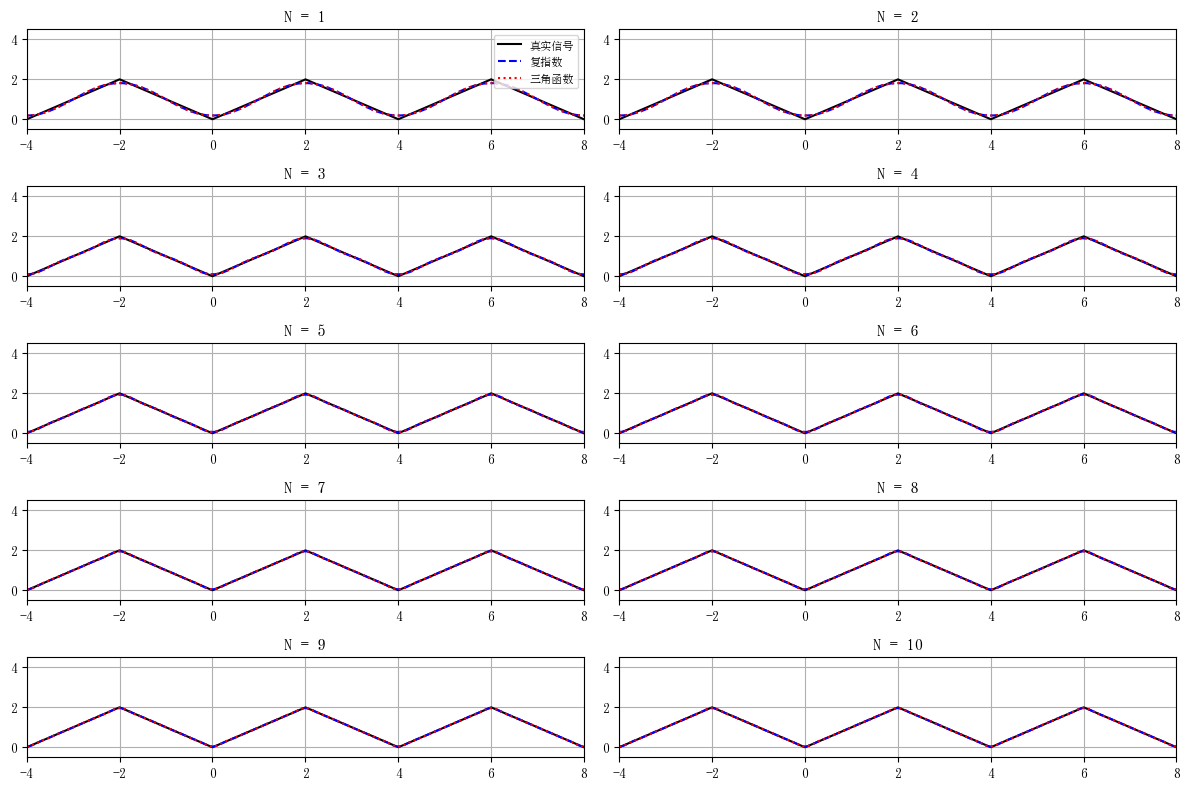

In [20]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimSong']  # 指定支持中文的字体
matplotlib.rcParams['axes.unicode_minus'] = False    # 正确显示负号
# 信号参数
T = 4.0                     # 周期
omega0 = 2 * np.pi / T      # 基频
N_coef = 10                 # 计算系数范围：k=-10,...,10
t_period = np.linspace(0, T, 1000)  # 一个周期上的采样点

# 定义周期三角信号 x(t):
# 当 0<=t<=T/2 时，x(t)=t；当 T/2<t<=T 时，x(t)=4-t
def x_signal(t):
    t_mod = np.mod(t, T)  # 对 t 取模得到周期内坐标
    return np.where(t_mod <= T/2, t_mod, 4 - t_mod)

# 计算复指数傅立叶系数 a_k（在一个周期内积分）
a_k = {}
for k in range(-N_coef, N_coef+1):
    integrand = x_signal(t_period) * np.exp(-1j * k * omega0 * t_period)
    a = (1/T) * np.trapz(integrand, t_period)
    a_k[k] = a

# 将系数转换为数组便于绘图（按 k 从 -N_coef 到 N_coef排序）
k_vals = np.arange(-N_coef, N_coef+1)
a_vals = np.array([a_k[k] for k in k_vals])

# 绘制复指数傅立叶系数（实部、虚部及幅值、相位）
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.stem(k_vals, a_vals.real, basefmt=" ")
plt.stem(k_vals, a_vals.imag, linefmt='r--', markerfmt='ro', basefmt=" ")
plt.xlabel('k')
plt.ylabel('Coefficient')
plt.title('复指数傅立叶系数（实部：蓝，虚部：红）')
plt.grid(True)

plt.subplot(1,2,2)
plt.stem(k_vals, np.abs(a_vals), basefmt=" ")
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.title('傅立叶系数幅值')
plt.grid(True)
plt.tight_layout()
plt.show()

k_range = np.arange(0, N_coef+1)
cos_amp = [2 * a_k[k].real for k in k_range]    # 余弦项系数：2Re(aₖ)
sin_amp = [-2 * a_k[k].imag for k in k_range]   # 正弦项系数：-2Im(aₖ)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(k_range, cos_amp, basefmt=" ")
plt.xlabel('k')
plt.ylabel('余弦项幅值')
plt.title('余弦项 ($2\Re(a_k)$)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(k_range, sin_amp, basefmt=" ")
plt.xlabel('k')
plt.ylabel('正弦项幅值')
plt.title('正弦项 ($-2\Im(aₖ)$)')
plt.grid(True)

plt.tight_layout()
plt.show()

# 构造时间轴用于重构和比较波形
t_full = np.linspace(-T, 2*T, 2000)
x_true = x_signal(t_full)

# 使用复指数形式重构有限项傅立叶级数：
# x_N(t) = sum_{k=-N}^{N} a_k * exp(j*k*omega0*t)
def reconstruct_complex(N, t):
    x_rec = np.zeros_like(t, dtype=complex)
    for k in range(-N, N+1):
        x_rec += a_k[k] * np.exp(1j * k * omega0 * t)
    return x_rec.real  # 原信号为实值

# 使用三角函数形式重构：
# 利用 a_0 和对于 k>=1, A_k=2|a_k| ，phi_k = angle(a_k)
def reconstruct_trig(N, t):
    a0 = a_k[0].real
    x_rec = a0 * np.ones_like(t)
    for k in range(1, N+1):
        A_k = 2 * np.abs(a_k[k])
        phi_k = np.angle(a_k[k])
        x_rec += A_k * np.cos(k * omega0 * t - phi_k)
    return x_rec

# 绘制有限项逼近：对 N=1,...,10 分别绘制复指数形式与三角函数形式的逼近结果
plt.figure(figsize=(12, 8))
for N in range(1, 11):
    x_rec_complex = reconstruct_complex(N, t_full)
    x_rec_trig = reconstruct_trig(N, t_full)
    plt.subplot(5, 2, N)
    plt.plot(t_full, x_true, 'k', label='真实信号')
    plt.plot(t_full, x_rec_complex, 'b--', label='复指数')
    plt.plot(t_full, x_rec_trig, 'r:', label='三角函数')
    plt.title(f'N = {N}')
    plt.xlim(-T, 2*T)
    plt.ylim(-0.5, 4.5)
    if N == 1:
        plt.legend(fontsize=8)
    plt.grid(True)
plt.tight_layout()
plt.show()

### B

对周期方波和上面的周期三角波，分别绘图演示其有限项级数 $x_N(t)$ 当项数 $N=10,100,1000$ 时对 $x(t)$ 的逼近效果。对比分析两者逼近过程中是否出现吉布斯（Gibbs）现象并解释原因。

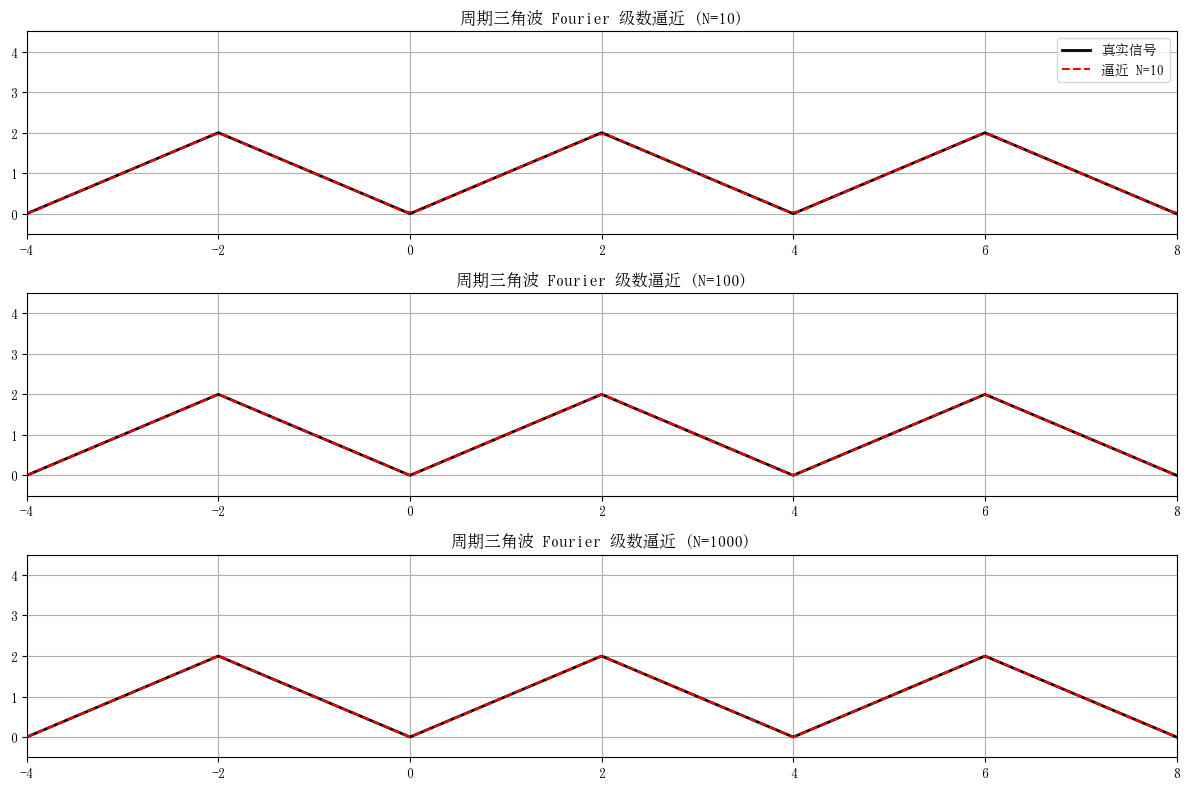

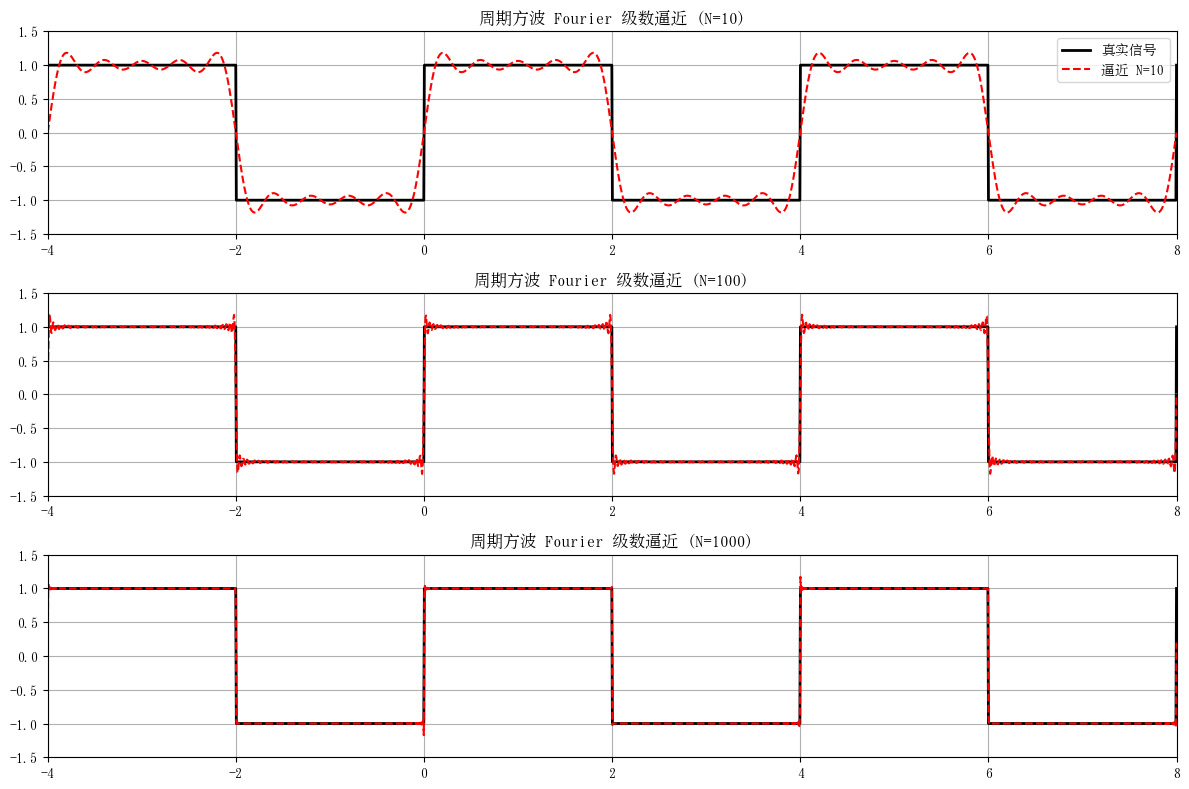

观察结果：
1. 对于周期方波，因信号存在跳变，不连续点附近会出现明显的振铃现象，即吉布斯现象，该现象不会随截断项数无限增加而消失。
2. 而周期三角波信号本身连续，虽然在导数处有不连续，其傅立叶逼近不会出现明显的振铃，逼近效果较好。


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 信号周期和基本频率
T = 4.0     
omega0 = 2 * np.pi / T

# 定义周期三角波：当 0<=t<=T/2 时，x(t)=t；当 T/2<t<=T 时，x(t)=4-t
def x_triangle(t):
    t_mod = np.mod(t, T)
    return np.where(t_mod <= T/2, t_mod, 4 - t_mod)

# 定义周期方波：当 0<=t<T/2 时取 1，T/2<=t<T 时取 -1
def x_square(t):
    t_mod = np.mod(t, T)
    return np.where(t_mod < T/2, 1.0, -1.0)

# 采样点用于数值积分（在一个周期内）
t_period = np.linspace(0, T, 10000)

# 计算傅立叶系数
def compute_fourier_coeffs(x_func, N_coef):
    a_k = {}
    for k in range(-N_coef, N_coef+1):
        integrand = x_func(t_period) * np.exp(-1j * k * omega0 * t_period)
        a = (1/T) * np.trapz(integrand, t_period)
        a_k[k] = a
    return a_k

# 利用复指数形式重构信号
def reconstruct_signal(a_k, N, t):
    x_rec = np.zeros_like(t, dtype=complex)
    for k in range(-N, N+1):
        x_rec += a_k[k] * np.exp(1j * k * omega0 * t)
    return x_rec.real  # 原信号均为实值

# 为了得到较高精度的傅立叶系数，这里计算较宽的系数范围
N_coef_all = 1000  
a_k_triangle = compute_fourier_coeffs(x_triangle, N_coef_all)
a_k_square = compute_fourier_coeffs(x_square, N_coef_all)

# 构造时间轴用于重构（显示多个周期以便观察边缘）
t_full = np.linspace(-T, 2*T, 2000)

# 不同截断数
Ns = [10, 100, 1000]

# 绘制周期三角波的有限项逼近
plt.figure(figsize=(12, 8))
for i, N in enumerate(Ns, 1):
    x_rec = reconstruct_signal(a_k_triangle, N, t_full)
    plt.subplot(len(Ns), 1, i)
    plt.plot(t_full, x_triangle(t_full), 'k', lw=2, label='真实信号')
    plt.plot(t_full, x_rec, 'r--', lw=1.5, label=f'逼近 N={N}')
    plt.title(f'周期三角波 Fourier 级数逼近 (N={N})')
    plt.xlim(-T, 2*T)
    plt.ylim(-0.5, 4.5)
    plt.grid(True)
    if i == 1:
        plt.legend()
plt.tight_layout()
plt.show()

# 绘制周期方波的有限项逼近
plt.figure(figsize=(12, 8))
for i, N in enumerate(Ns, 1):
    x_rec = reconstruct_signal(a_k_square, N, t_full)
    plt.subplot(len(Ns), 1, i)
    plt.plot(t_full, x_square(t_full), 'k', lw=2, label='真实信号')
    plt.plot(t_full, x_rec, 'r--', lw=1.5, label=f'逼近 N={N}')
    plt.title(f'周期方波 Fourier 级数逼近 (N={N})')
    plt.xlim(-T, 2*T)
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    if i == 1:
        plt.legend()
plt.tight_layout()
plt.show()

# 分析说明
print("观察结果：")
print("1. 对于周期方波，因信号存在跳变，不连续点附近会出现明显的振铃现象，即吉布斯现象，该现象不会随截断项数无限增加而消失。")
print("2. 而周期三角波信号本身连续，虽然在导数处有不连续，其傅立叶逼近不会出现明显的振铃，逼近效果较好。")

### C

已知微分方程

$$
\frac{dy}{dt} + 2y(t) = x(t)
$$

满足初始松弛条件。计算该方程所对应系统的频率响应。将 A 中的周期三角波输入该系统，用 Python 求解并绘制其输出响应。

#### Solution

连续时间线性时不变系统输入输出满足如下微分方程形式，

$$
\sum_{k = 0}^Na_k\frac{d^ky(t)}{dt^k} = \sum_{k = 0}^Mb_k\frac{d^kx(t)}{dt^k}
$$

故得到

$$
a_0 = 2, \quad a_1 = 1, \quad b_0 = 1
$$

故

$$
H(j\omega) = \frac{1}{2+j\omega}
$$

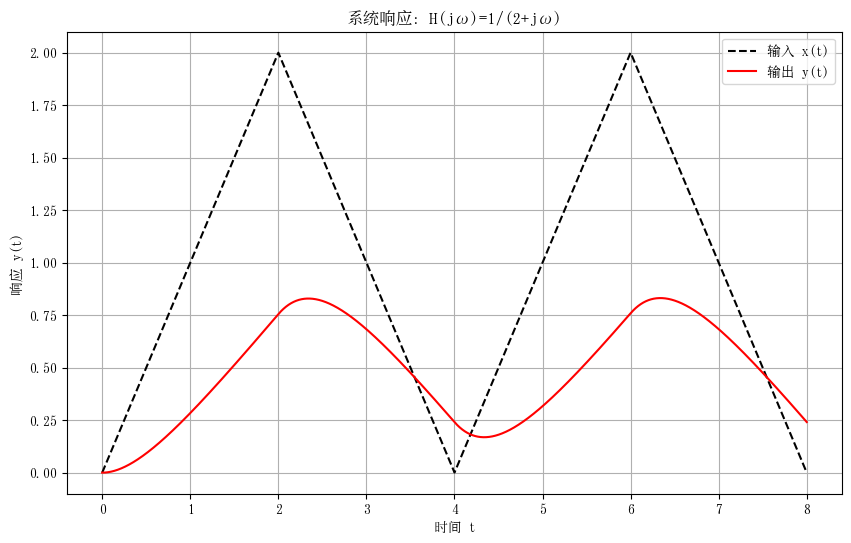

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 定义系统传递函数 H(s)=1/(s+2)
num = [1]       # 分子
den = [1, 2]    # 分母 s+2
system = signal.lti(num, den)

# 定义时间轴（例如观察两个周期）
t = np.linspace(0, 8, 8000)

# 定义周期三角波输入 x(t)
T = 4.0
def x_signal(t):
    t_mod = np.mod(t, T)  # 将 t 映射到 [0, T) 内
    return np.where(t_mod <= T/2, t_mod, 4 - t_mod)

x = x_signal(t)

# 利用 lsim 求解系统响应（初始条件默认为 0）
t_out, y_out, _ = signal.lsim(system, U=x, T=t)

# 绘制输入与输出
plt.figure(figsize=(10, 6))
plt.plot(t, x, 'k--', label='输入 x(t)')
plt.plot(t_out, y_out, 'r-', label='输出 y(t)')
plt.title('系统响应：H(jω)=1/(2+jω)')
plt.xlabel('时间 t')
plt.ylabel('响应 y(t)')
plt.legend()
plt.grid(True)
plt.show()

## 思考题

用以下复指数形式推导三角函数形式的傅立叶级数。

$$
\begin{cases}
x(t) = \sum\limits_{k = -\infty}^\infty a_ke^{jk\omega_0 t} \\
a_k = \frac{1}{T} \int_T x(t)e^{-j\omega_0t} dt
\end{cases}
$$

三角函数形式

$$
\begin{cases}
x(t) = \frac{c_0}{2} + \sum_{k = 1}^\infty c_k\cos(k\omega_0t) + \sum_{k = 1}^\infty d_k\sin (k\omega_0t) \\
c_0 = \frac{2}{T}\int_T x(t) dt \\
c_k = \frac{2}{T}x(t)\cos (k\omega_0t) dt \\
d_k = \frac{2}{T}x(t)\sin (k\omega_0t) dt
\end{cases}
$$

### Solution

$$
  x(t) = \sum_{k=-\infty}^{\infty} a_k e^{j k \omega_0 t},\quad
  a_k = \frac{1}{T} \int_{T} x(t) \, e^{-j k \omega_0 t}\, dt.
$$

$$
  a_{-k} = a_k^*.
$$  
将 $k=0$ 项单独拿出，其余正负 $k$ 项成对出现，可以写为  
$$
  x(t) = a_0 + \sum_{k=1}^{\infty} \Bigl[ a_k e^{j k \omega_0 t} + a_k^* e^{-j k \omega_0 t} \Bigr].
$$
$$
  a_k e^{j k \omega_0 t} + a_k^* e^{-j k \omega_0 t} = 2\,\Re\{a_k e^{j k \omega_0 t}\},
$$  
可写为  
$$
  x(t) = a_0 + 2 \sum_{k=1}^{\infty} \Re\{a_k e^{j k \omega_0 t}\}.
$$  
令 $a_k=|a_k|e^{j\varphi_k}$，则  
$$
  \Re\{a_k e^{j k \omega_0 t}\} = |a_k|\cos(k\omega_0t+\varphi_k).
$$ 
$$
  x(t) = a_0 + 2 \sum_{k=1}^{\infty} |a_k|\cos(k\omega_0t+\varphi_k).
$$  
利用余弦加法公式  
$$
  \cos(k\omega_0t+\varphi_k)=\cos\varphi_k\cos(k\omega_0t) - \sin\varphi_k\sin(k\omega_0t),
$$  
令  
$$
  c_0 = 2a_0,\quad c_k = 2|a_k|\cos\varphi_k,\quad d_k = -2|a_k|\sin\varphi_k,\quad (k\ge1),
$$  
得  
$$
  x(t) = \frac{c_0}{2} + \sum_{k=1}^{\infty} \Bigl[ c_k\cos(k\omega_0t) + d_k\sin(k\omega_0t)\Bigr].
$$

这样就得到了三角函数形式的傅立叶级数。

# 实验四 离散时间非周期信号的傅立叶变换

## 任务一

编程计算双边指数衰减信号 $x[n] = e^{-2|n|}$ 的离散时间傅立叶变换，并验证其时域内插值，即

$$
x_k[n] = \begin{cases}
x[n / k], & k | n \\
0,  & {\rm otherwise}
\end{cases}
$$

的离散傅立叶变换，取 $k = 3$。请分别绘制 $x[n]$ 和 $x_k[n]$ 的幅频曲线和相频曲线。

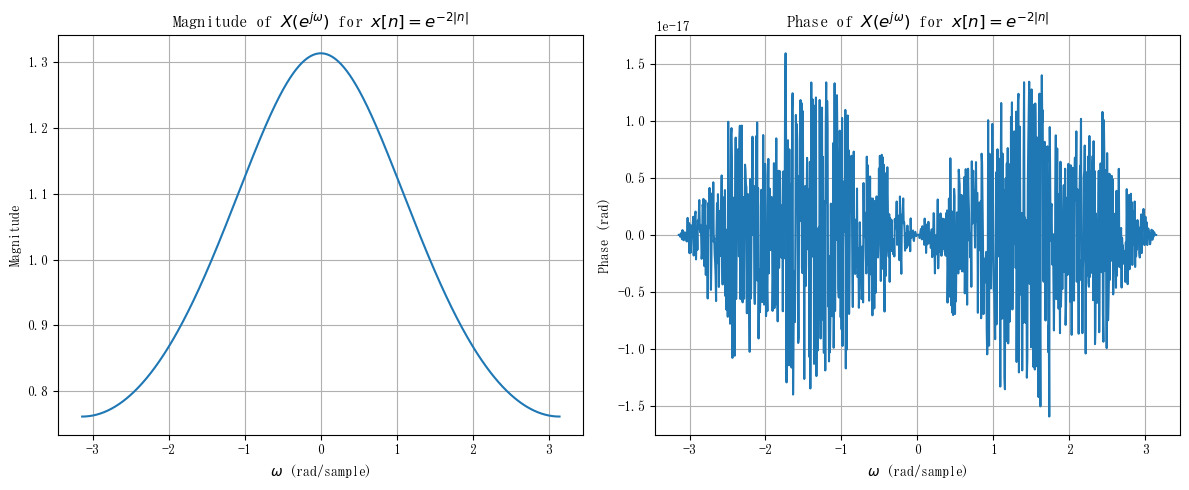

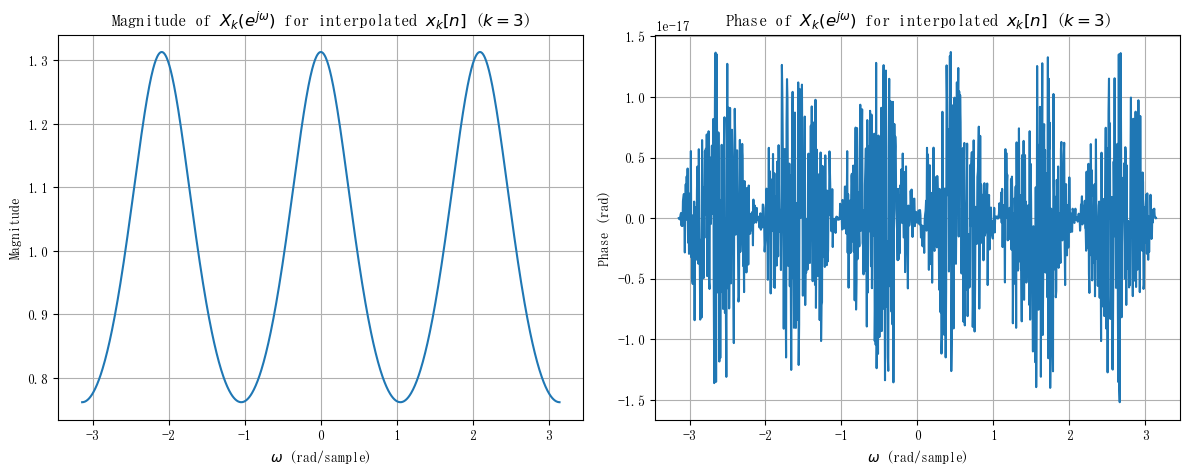

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 为了近似无限长序列，设取 n 从 -50 到 50
N = 50
n = np.arange(-N, N+1)

# 定义双边指数衰减信号 x[n] = e^{-2|n|}
x = np.exp(-2 * np.abs(n))

# 定义频率网格（单位：rad/sample），覆盖 -π 到 π
w = np.linspace(-np.pi, np.pi, 1024)

# 计算 DTFT: X(w) = \sum_{n=-N}^N x[n] e^{-jωn}
X = np.sum(x[:, None] * np.exp(-1j * np.outer(n, w)), axis=0)

# 定义插值后的序列 x_k[n]
# 当 n 能被 3 整除时，令 m = n/3，x_k[n] = x[m] = e^{-2|m|}；否则为 0
xk = np.where(n % 3 == 0, np.exp(-2 * np.abs(n // 3)), 0)
Xk = np.sum(xk[:, None] * np.exp(-1j * np.outer(n, w)), axis=0)

# 绘制 x[n] 的 DTFT 幅频和相频曲线
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(w, np.abs(X))
plt.xlabel(r'$\omega$ (rad/sample)')
plt.ylabel('Magnitude')
plt.title(r'Magnitude of $X(e^{j\omega})$ for $x[n]=e^{-2|n|}$')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(w, np.angle(X))
plt.xlabel(r'$\omega$ (rad/sample)')
plt.ylabel('Phase (rad)')
plt.title(r'Phase of $X(e^{j\omega})$ for $x[n]=e^{-2|n|}$')
plt.grid(True)
plt.tight_layout()
plt.show()

# 绘制 x_k[n] 的 DTFT 幅频和相频曲线
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(w, np.abs(Xk))
plt.xlabel(r'$\omega$ (rad/sample)')
plt.ylabel('Magnitude')
plt.title(r'Magnitude of $X_k(e^{j\omega})$ for interpolated $x_k[n]$ ($k=3$)')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(w, np.angle(Xk))
plt.xlabel(r'$\omega$ (rad/sample)')
plt.ylabel('Phase (rad)')
plt.title(r'Phase of $X_k(e^{j\omega})$ for interpolated $x_k[n]$ ($k=3$)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 任务二

考虑差分方程 

$$
y[n] - ay[n-1] = x[n]
$$

其中，$|a| < 1$。取 $a = 0.2$，编程求解该方程的频率响应，并

(a) 画出系统的幅频和相频特性曲线；

(b) 求解系统的单位冲激响应并绘制出图形

### Solution

$$
H(e^{j\omega}) = \frac{Y(e^{j\omega})}{X(e^{j\omega})} = \frac{\sum_{k = 0}^Mb_ke^{-jk\omega}}{\sum_{k = 0}^Na_ke^{-jk\omega}} = \frac{1}{1 - 0.2e^{-j\omega}}
$$

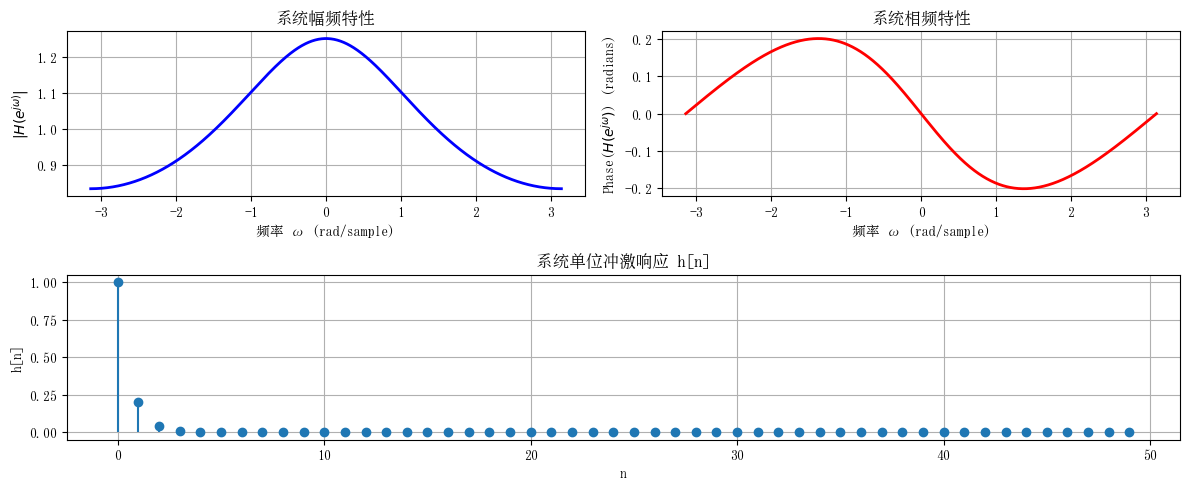

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# (a) 求系统的频率响应 H(e^(jω)) 的幅频和相频特性
# ------------------------------
a = 0.2  # 取 a = 0.2

# 定义频率采样区间：从 -π 到 π（rad/sample）
omega = np.linspace(-np.pi, np.pi, 1024)

# 计算频率响应：H(e^(jω)) = 1 / (1 - a e^(-jω))
H = 1.0 / (1 - a * np.exp(-1j * omega))

# 分别取幅值和相位
H_magnitude = np.abs(H)
H_phase = np.angle(H)

fig = plt.figure(figsize=(12, 5))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

ax1.plot(omega, H_magnitude, 'b', linewidth=2)
ax1.set_title("系统幅频特性")
ax1.set_xlabel("频率 ω (rad/sample)")
ax1.set_ylabel("$|H(e^{jω)}|$")
ax1.grid(True)

ax2.plot(omega, H_phase, 'r', linewidth=2)
ax2.set_title("系统相频特性")
ax2.set_xlabel("频率 ω (rad/sample)")
ax2.set_ylabel("Phase($H(e^{jω})$) (radians)")
ax2.grid(True)

# ------------------------------
# (b) 求系统的单位冲激响应 h[n]
# ------------------------------
# 根据理论，h[n] = a^n * u[n]，这里 u[n] 为单位阶跃（n>=0）
n = np.arange(0, 50)   # 取 n 从 0 到 49
h = a ** n             # 对于 n<0 h[n]=0

ax3.stem(n, h, basefmt=" ")
ax3.set_title("系统单位冲激响应 h[n]")
ax3.set_xlabel("n")
ax3.set_ylabel("h[n]")
ax3.grid(True)
plt.tight_layout()
plt.show()

## 任务三

设离散时间双边指数衰减信号 $x[n] = e^{-2|n|}, y[n] = x[n] * x[n]$，请

(a) 编程用卷积性质求解 $Y(j\omega)$ 与 $y[n]$，并绘制 $x[n], |Y(e^{j\omega})|$ 和 $y[n]$ 的图像

(b) 编程用时域卷积求解 $y[n]$，绘制 $y[n]$ 的图像，并与 (a) 的结果比较

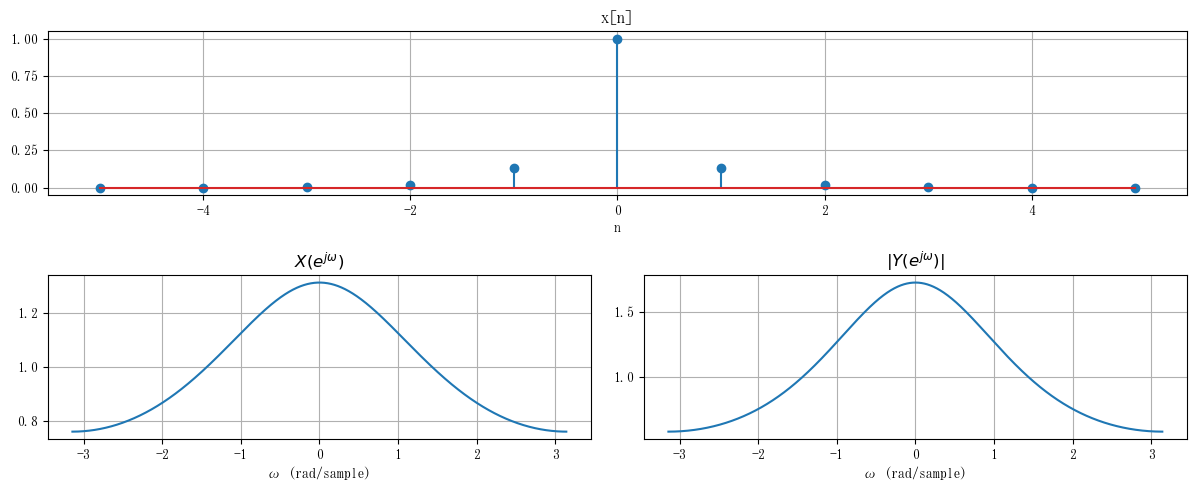

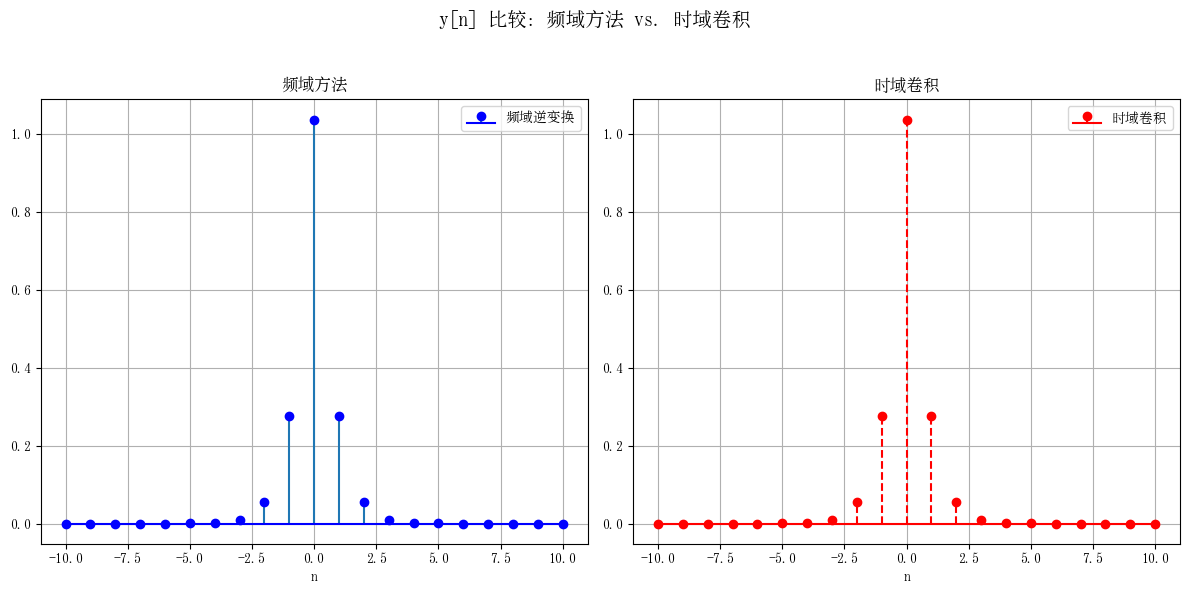

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# 设置序列范围及定义 x[n]
N = 5
n = np.arange(-N, N+1)         # n从 -5 到 5，共 11 点
x = np.exp(-2 * np.abs(n))      # x[n] = e^(-2|n|)

fig = plt.figure(figsize=(12, 5))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax3 = plt.subplot2grid((2, 2), (1, 1))

# 绘制 x[n]
ax1.stem(n, x)
ax1.set_title('x[n]')
ax1.set_xlabel('n')
ax1.grid(True)

# 选择均匀的频率网格：ω ∈ [-π, π)
num_w = 2048
w = np.linspace(-np.pi, np.pi, num_w, endpoint=False)
dw = w[1] - w[0]

# 计算 DTFT： X(e^(jω)) = Σₙ x[n] e^(-jωn)
# 利用矩阵乘法：令 x 为 (101,1) 的列向量，计算 exp(-j n ω) 得 (101, num_w) 数组，然后对 n 求和
X = np.sum(x[:, None] * np.exp(-1j * n[:, None] * w[None, :]), axis=0)

ax2.plot(w, X)
ax2.set_title(r'$X(e^{j\omega})$')
ax2.set_xlabel('ω (rad/sample)')
ax2.grid(True)


# 根据卷积特性，y[n] 的 DTFT = Y(e^(jω)) = X(e^(jω))^2
Y = X**2

# 计算逆 DTFT，求得 y[n] 的近似值
# 选取 n 范围为：从 -2N 到 2N（即 -100 到 100，共 201 点）
n_conv = np.arange(-2*N, 2*N+1)
y_freq = np.zeros(len(n_conv), dtype=complex)

# 离散化逆 DTFT公式： y[n] = (1/(2π)) Σ_{ω_i} Y(e^(jω_i)) exp(jω_i n) dw
for i, ni in enumerate(n_conv):
    y_freq[i] = np.sum(Y * np.exp(1j * w * ni)) * dw/(2*np.pi)
y_freq = y_freq.real   # 理论上 y[n] 为实数

# 绘制 |Y(e^(jω))|
ax3.plot(w, np.abs(Y))
ax3.set_title(r'$|Y(e^{j\omega})|$')
ax3.set_xlabel('ω (rad/sample)')
ax3.grid(True)

plt.tight_layout()
plt.show()

# 利用 np.convolve 进行卷积，mode='full' 得到长度 201 的序列
y_time = np.convolve(x, x, mode='full')
n_time = np.arange(-2*N, 2*N+1)  # 索引范围为 -100 到 100

# 绘制直接时域卷积的结果，与频域逆变换结果并排显示
plt.figure(figsize=(12,6))

# 左侧子图：频域逆变换得到的 y[n]
plt.subplot(1,2,1)
plt.stem(n_conv, y_freq, markerfmt='bo', basefmt='b-', label='频域逆变换')
plt.title('频域方法')
plt.xlabel('n')
plt.grid(True)
plt.legend(fontsize=10)

# 右侧子图：时域直接卷积得到的 y[n]
plt.subplot(1,2,2)
plt.stem(n_time, y_time, linefmt='r--', markerfmt='ro', basefmt='r-', label='时域卷积')
plt.title('时域卷积')
plt.xlabel('n')
plt.grid(True)
plt.legend(fontsize=10)

plt.suptitle('y[n] 比较：频域方法 vs. 时域卷积', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 实验结果意义

1. **基本信号的变换（实验一）**
   
   - 通过对三角波进行平移、翻转和尺度变换的实验，验证了时间变换的基本原理。  
   
   - 这种变换不仅改变了信号的形状，还反映出信号在时域中的局部结构，说明时域操作如何影响信号特性。

2. **卷积运算的验证（实验二）**
   - 对连续时间和离散时间信号进行卷积运算，结果证明了卷积作为线性时不变系统（LTI）的输入—输出关系的真实性。  
   - 同时，通过构造正确的时间（或序列）向量，使得卷积结果与原信号之间实现严格对应，这说明在实际数值计算中需要关注采样间隔与信号起始时刻。  
   - 此外，利用卷积结果与时间变化的对应关系，加深了对卷积积分（或求和）结构的理解，以及滤波、系统平滑和去噪功能的实际意义。

3. **傅立叶级数逼近（实验三）**
   - 分别采用复指数形式和三角函数形式求周期信号的傅立叶系数，并用有限项级数逼近原信号。实验结果表明：  
     - 对于连续且平滑的周期三角波，级数逼近效果较好，近似结果与真实信号非常接近。  
     - 对于存在跳变的不连续信号（如方波），逼近过程中会出现明显的振铃现象（即吉布斯现象），这种现象在理论上不会随着截断项数的无限增多而消除。  
   - 这些结果直观地展示了频域展开和逼近理论在描述信号时的优缺点，使人们能更好地理解傅立叶级数的收敛性质及其在实际工程中的应用局限。

4. **离散傅立叶变换及系统频率响应（实验四）**  
   - 通过对非周期信号（例如双边指数衰减信号）的离散傅立叶变换及其插值验证，进一步展示了如何通过数值方法求解DTFT以及如何利用频域信息分析时域信号。
   -  另外，通过对差分方程系统（如 $y[n] – a·y[n–1] = x[n]$）求频率响应和单位冲激响应，直观地验证了系统的LTI特性和稳定性（参数 |a| < 1）。  
   - 频率响应的幅频和相频特性曲线帮助理解系统滤波作用，而直接对应的冲激响应图形则展现了系统在时域中的特性。这为设计数字滤波器、信号处理及控制系统提供了直观支持。
   - 分别通过频域方法和时域卷积的计算，成功验证了离散傅立叶变换的卷积性质。